In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings

In [5]:
# Load the California Housing dataset from sklearn
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# Convert the dataset into a pandas DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

# Check for missing values
print(data.isnull().sum())

# Display the first 5 rows of the DataFrame
print(data.head())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


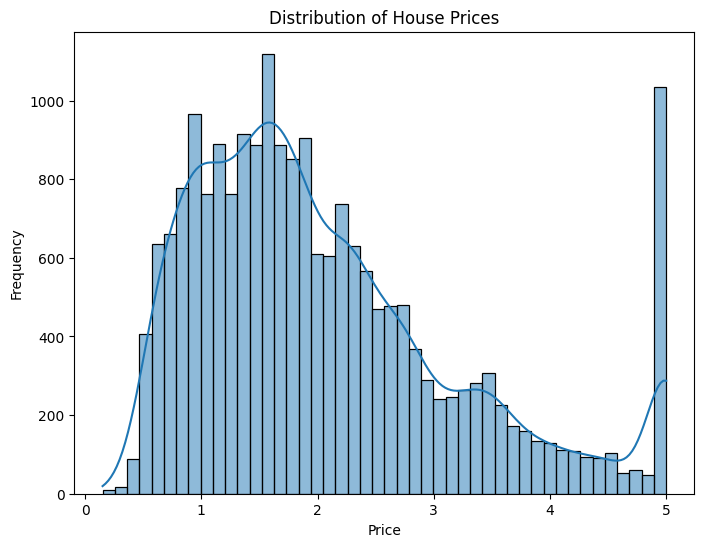

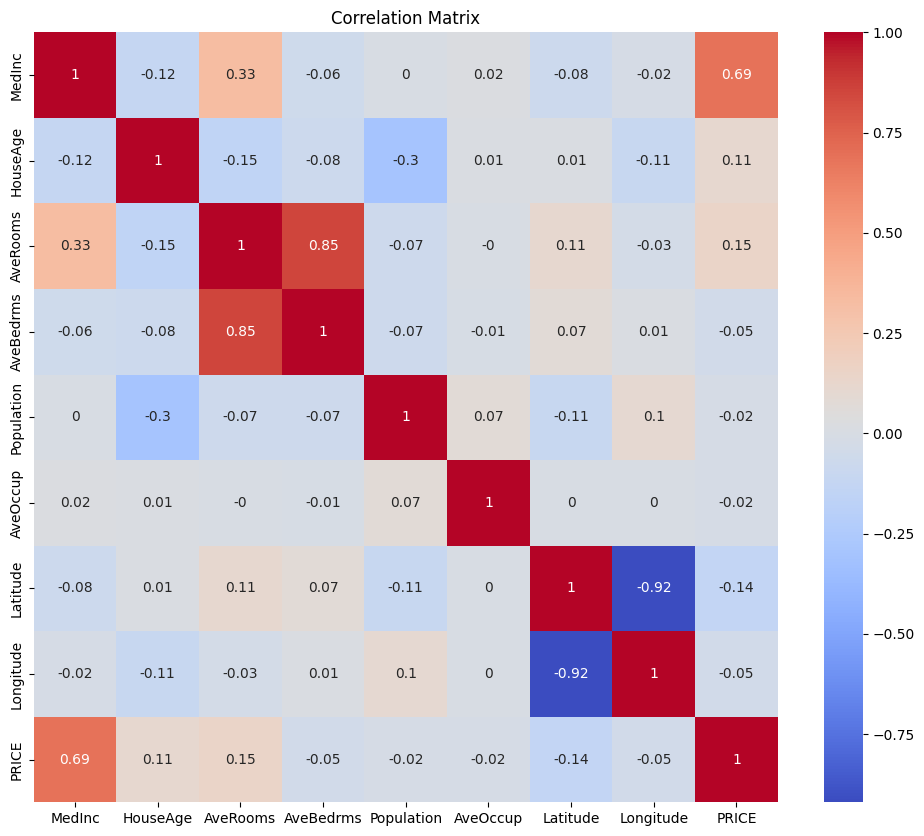

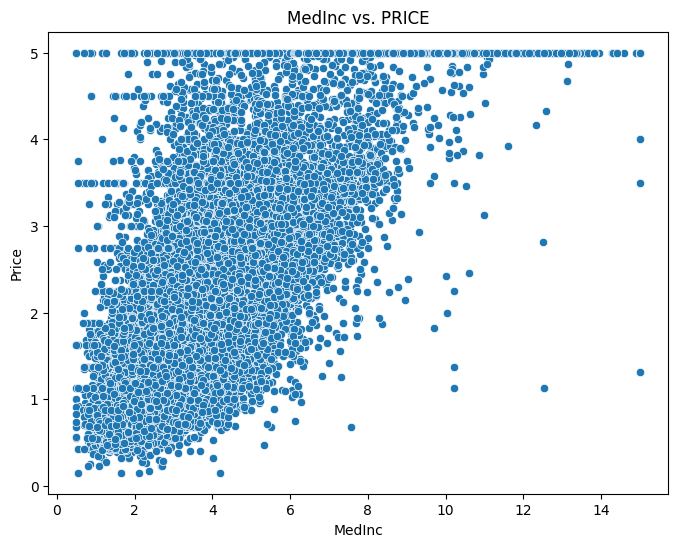

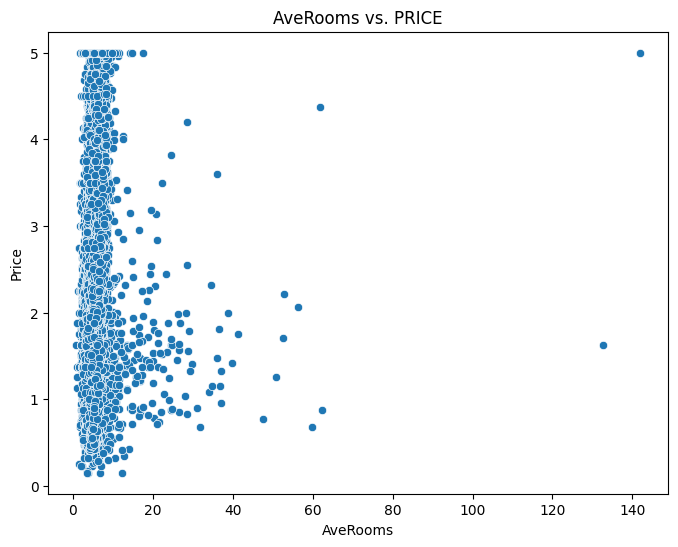

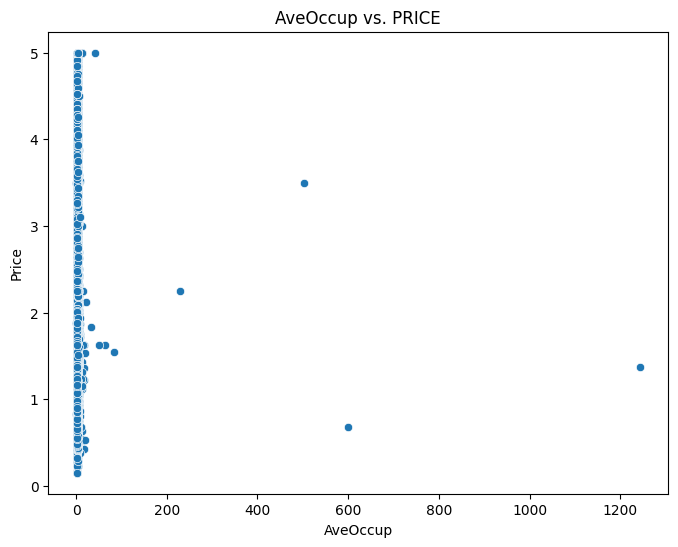

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['PRICE'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for important features vs. target variable
features = ['MedInc', 'AveRooms', 'AveOccup']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='PRICE')
    plt.title(f'{feature} vs. PRICE')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


Training Data R2 Score: 0.943650140819218
Testing Data R2 Score: 0.8338000331788725


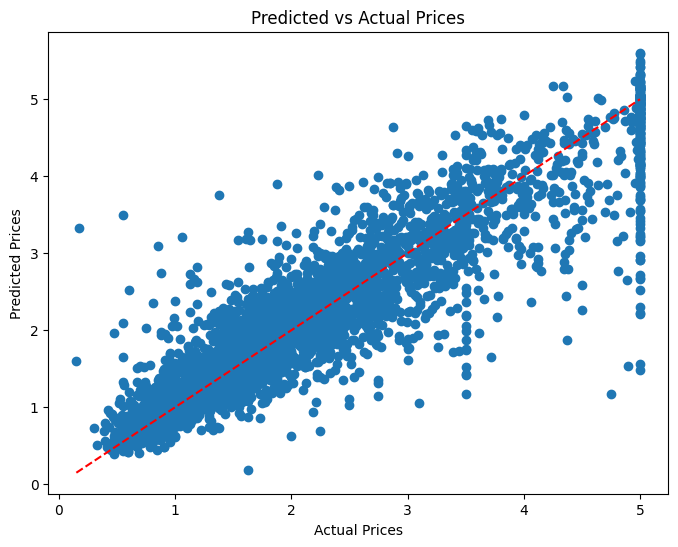

In [7]:
# Splitting the data into training and testing sets
X = data.drop(columns='PRICE', axis=1)
Y = data['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training: XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, Y_train)

# Model Evaluation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(f"Training Data R2 Score: {metrics.r2_score(Y_train, train_predictions)}")
print(f"Testing Data R2 Score: {metrics.r2_score(Y_test, test_predictions)}")

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [8]:
def get_user_input():
    print("Enter the following details for house price prediction:")
    MedInc = float(input("MedInc (median income in block group): "))
    HouseAge = float(input("HouseAge (median house age in block group): "))
    AveRooms = float(input("AveRooms (average number of rooms per household): "))
    AveBedrms = float(input("AveBedrms (average number of bedrooms per household): "))
    Population = float(input("Population (block group population): "))
    AveOccup = float(input("AveOccup (average number of household members): "))
    Latitude = float(input("Latitude (block group latitude): "))
    Longitude = float(input("Longitude (block group longitude): "))

    user_data = pd.DataFrame([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]],
                             columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
    return user_data


In [9]:
user_data = get_user_input()
predicted_price = model.predict(user_data)
print(f"The predicted house price is: ${predicted_price[0]:.2f}")

Enter the following details for house price prediction:
MedInc (median income in block group): 12000
HouseAge (median house age in block group): 40
AveRooms (average number of rooms per household): 3
AveBedrms (average number of bedrooms per household): 2
Population (block group population): 120000
AveOccup (average number of household members): 12
Latitude (block group latitude): 29.19
Longitude (block group longitude): 22.21
The predicted house price is: $4.12
